# Implementation Naive Bayes classifier and Online Learning   
* 

In [41]:
import numpy as np
from functools import reduce
%matplotlib inline
from functools import reduce
import matplotlib.pyplot as plt
from math import log, sqrt, exp, pi, factorial, erf

In [42]:
class load_file():
    def __init__(self, file):
        self.filename = file
        self.dset = []
        
        with open(self.filename, mode='rb') as f:
            magic_number = f.read(4) # read first four bytes
            
            self.n_dim = magic_number[-1] #n_dim=3
            
            self.n_dims = [int.from_bytes(f.read(4), byteorder='big') for _ in range(self.n_dim)] #n_dims=[60000,28,28]
            #read a vector of size 784 for each iteration 
            for idx in range(self.n_dims[0]):
                item = f.read(reduce(lambda x,y: x*y, (self.n_dims[1:] + [1]))) 
        
                self.dset.append(item)

In [43]:
file_1 = 'train-images.idx3-ubyte'
file_2 = 'train-labels.idx1-ubyte'
file_3 = 't10k-images.idx3-ubyte'
file_4 = 't10k-labels.idx1-ubyte'

In [44]:
train_x = load_file(file_1)
train_y = load_file(file_2)
test_x  = load_file(file_3)
test_y  = load_file(file_4)

In [45]:
len(train_x.dset), len(train_y.dset), len(test_x.dset), len(test_y.dset)

(60000, 60000, 10000, 10000)

In [46]:
def showImage(byte, row = 28, col = 28):
    im = [[byte[i*28 + j] for j in range(col)] for i in range(row)]
    
    plt.imshow(im, cmap='gray')

labels [10] : 3


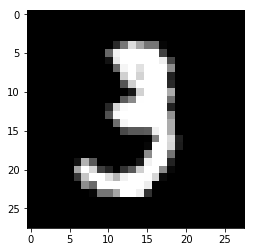

In [47]:
data_idx = 10
showImage(train_x.dset[data_idx])
print("labels [{}] : {}".format(data_idx, train_y.dset[data_idx][0]))

# Discrete

In [53]:
# cnt_pixels[class][pixels][bins]
def cnt_pixclass(train_x, train_y, w = 28, h = 28, nc = 10, bins = 10**-6):
    
    pixels_cnt = [[[bins for _ in range(32)] for _ in range(w * h)] for _ in range(nc)]
    
    classes_cnt = [0 for _ in range(nc)]

    for indx, data in enumerate(train_x):
        
        
        classes_cnt[train_y[indx][0]] += 1
        
        for i in range(len(data)):
            pixels_cnt[train_y[indx][0]][i][data[i] >> 3] += 1
                
    return classes_cnt, pixels_cnt

In [58]:
def fit_posterior_disc(test_x, test_y, classes_cnt, pixels_cnt):
    posterior = [[0 for _ in range(10)] for _ in range(len(test_x))]
    accuracy = 0
    
    for indx, data in enumerate(test_x):
        for y in range(10):
            for i in range(len(data)):
                
                posterior[indx][y] += log(pixels_cnt[y][i][data[i] >> 3])
                
            posterior[indx][y] -= (len(data) - 1 ) * log(classes_cnt[y])
            #posterior[idx][label] += log(cnt_classes[label])
            
        pred = np.argmax(posterior[indx])
        answ = test_y[indx][0]
        
        if pred == answ:
            accuracy += 1
    print("Accuracy on test images:", accuracy/len(test_y))
    return posterior, accuracy 

In [75]:
def predict(test_labels, posterior,indx):
    p=np.array(posterior[indx])/np.array(posterior[indx]).sum()
    print('Posterior (in log scale):\n')
    for key in (range(0,len(p))):
        print(key,':',p[key]) #print marginalized posterior 

    print("index: {}\t label : {}\t predict : {}".format(indx, test_y.dset[indx][0], np.argmax(posterior[indx])))

In [67]:
def imagination_discrete(count_pixels,label=0):
    pixel_sum_015=0
    pixel_sum_031=0
    img_num =[0 for _ in range (28*28)]
    for i in range (784):
        for k in range(32):
            if k<16:
                pixel_sum_015=pixel_sum_015+count_pixels[label][i][k]
            else:
                pixel_sum_031=pixel_sum_031+count_pixels[label][i][k]
            
        if pixel_sum_015>pixel_sum_031:
            img_num[i]=0
            pixel_sum_015=0
        else:
            img_num[i]=1
            pixel_sum_031=0 
    img_num=np.array(img_num).reshape(28,28)
    print(img_num)
    
    #plt.imshow(img_num)

# Run Discrete Naive Bayes

In [68]:
cnt_classes, cnt_pixels = cnt_pixclass(train_x.dset, train_y.dset)
posterior, accuracy = fit_posterior_disc(test_x.dset, test_y.dset, cnt_classes, cnt_pixels)

Accuracy on test images: 0.8508


In [76]:
predict(test_y, posterior,indx=6)

Posterior (in log scale):

0 : 0.10791986716830107
1 : 0.14022635805906106
2 : 0.10101108316185439
3 : 0.0934057462599313
4 : 0.0829546091731439
5 : 0.0885178550027136
6 : 0.11456577642271916
7 : 0.09194392970975554
8 : 0.09068244277920456
9 : 0.08877233226331545
index: 6	 label : 4	 predict : 4


In [77]:
imagination_discrete(cnt_pixels,label=3)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 

In [78]:
"Discrete Error rate : {}".format(1-(accuracy/len(test_x.dset)))

'Discrete Error rate : 0.1492'

# Continous 

In [79]:
def extract_pixels(train_x,train_y):
    pixels = [[[] for _ in range(28*28)] for _ in range(10)]

    for indx, data in enumerate(train_x):
        for i in range(len(data)):
            pixels[train_y[indx][0]][i].append(data[i])
            
    return pixels
    
def normal(u, v):
    return lambda x : (exp(-1*(((x - u)**2) / (2*v) ) ) / sqrt(2*pi*v))

def pdf1(u, v):
    return lambda x : 0.5*(1 + erf((x - u)/(sqrt(2*v))))

def pdf(x, w, cdf):
    a = cdf(x - w/2)
    b = cdf(x + w/2)
    return b - a

In [80]:
def sample_u_v(pixels):
    pixel_normal = [[[0, 0] for _ in range(28*28)] for _ in range(10)]
    var = 10**3

    for i in range(10):
        for j in range(28*28):
        
            n = len(pixels[i][j])
            u = sum(pixels[i][j]) / n
            v = sum([(x - u)**2 for x in pixels[i][j]]) / n
            pixel_normal[i][j][0] = u
        
            if v <= var:
                v = var
            pixel_normal[i][j][1] = v
            pixel_normal[i][j].append(normal(u, v))
            pixel_normal[i][j].append(pdf1(u, v))
        
    return pixel_normal

In [81]:
def fit_post_cont(test_x, test_y, pixel_normal, cnt_classess):
    accuracy = 0
    width = 1
    ln0 = 10**-10
    posterior = [[0 for _ in range(10)] for _ in range(len(test_x))]
    for indx, data in enumerate(test_x):
        for k in range(10):
            for i in range(28*28):
           
                p = pdf(data[i], width, pixel_normal[k][i][3])

                if p <= ln0:
                    posterior[indx][k] += log(ln0)
                    continue
                
                posterior[indx][k] += log(p)
            posterior[indx][k] += log(cnt_classes[k])
    
        pred = np.argmax(posterior[indx])
        answ = test_y[indx][0]
    
        if pred == answ:
            accuracy += 1
   
    return posterior, accuracy

In [82]:
def imagination_continous(pixels,label=3):
    pixel_mean=0
    img_num =[0 for _ in range (28*28)]
    for i in range (784):
        pixel_mean =pixels[label][i][0]
            
        if pixel_mean<=127:
            img_num[i]=0
            pixel_mean=0
        else:
            img_num[i]=1 
            pixel_mean=0
    img_num=np.array(img_num).reshape(28,28)
    print(img_num)

# Run continous Naive Bayes 

In [83]:
pixels=extract_pixels(train_x.dset,train_y.dset)
pixel_normal=sample_u_v(pixels)

In [84]:
poster, accuracy1 =fit_post_cont(test_x.dset, test_y.dset, pixel_normal, cnt_classes)

In [85]:
"Continuous accuracy: {}".format(accuracy/len(test_y.dset))

'Continuous accuracy: 0.8508'

In [87]:
predict(test_y.dset, poster,indx=9)

Posterior (in log scale):

0 : 0.10306149487014399
1 : 0.11229989126971714
2 : 0.10233893586749167
3 : 0.10202525967813285
4 : 0.0956631808355246
5 : 0.09863294727661963
6 : 0.10240148473075054
7 : 0.09402389601933993
8 : 0.09638031611014225
9 : 0.09317259334213739
index: 9	 label : 9	 predict : 9


In [88]:
imagination_continous(pixel_normal,label=9)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 

In [89]:
"Discrete Error rate : {}".format(1-(accuracy1/len(test_y.dset)))

'Discrete Error rate : 0.17000000000000004'

# Online Learning

In [90]:
tosscoin=[]
filename='tosscoin.txt'

with open(filename,'r') as f:
    tosses=f.readlines()
    for trail in tosses:
        N=len(trail[:-1])
        m=0
        for i in range(len(trail)):
            if trail[i]=='1':
                m+=1
        tosscoin.append((N,m))
print(tosscoin)

[(22, 13), (7, 5), (12, 9), (41, 37), (22, 13), (7, 4), (12, 7), (123, 111), (52, 28), (45, 26), (48, 22), (43, 22), (43, 21), (59, 32), (38, 16), (46, 23), (38, 15), (56, 27), (39, 18), (33, 16), (37, 21), (55, 30), (71, 36), (44, 21), (58, 23), (66, 32), (62, 36)]


In [91]:
def online_learning(tosscoin, init_a = 0, init_b = 0):
    beta_a = init_a
    beta_b = init_b

    print("Prior(a,b) : ({},{})".format(beta_a, beta_b))
    for idx, (N,m) in enumerate(tosscoin):

        prior_a = beta_a
        prior_b = beta_b
        beta_a += m
        beta_b += N-m

        print("Binomial likelihood: {:.3f}\t Prior(a,b): ({},{})\t Posterior(a,b): ({},{})".format(m/N, prior_a, prior_b, beta_a, beta_b))

In [92]:
online_learning(tosscoin, init_a=0, init_b=0)

Prior(a,b) : (0,0)
Binomial likelihood: 0.591	 Prior(a,b): (0,0)	 Posterior(a,b): (13,9)
Binomial likelihood: 0.714	 Prior(a,b): (13,9)	 Posterior(a,b): (18,11)
Binomial likelihood: 0.750	 Prior(a,b): (18,11)	 Posterior(a,b): (27,14)
Binomial likelihood: 0.902	 Prior(a,b): (27,14)	 Posterior(a,b): (64,18)
Binomial likelihood: 0.591	 Prior(a,b): (64,18)	 Posterior(a,b): (77,27)
Binomial likelihood: 0.571	 Prior(a,b): (77,27)	 Posterior(a,b): (81,30)
Binomial likelihood: 0.583	 Prior(a,b): (81,30)	 Posterior(a,b): (88,35)
Binomial likelihood: 0.902	 Prior(a,b): (88,35)	 Posterior(a,b): (199,47)
Binomial likelihood: 0.538	 Prior(a,b): (199,47)	 Posterior(a,b): (227,71)
Binomial likelihood: 0.578	 Prior(a,b): (227,71)	 Posterior(a,b): (253,90)
Binomial likelihood: 0.458	 Prior(a,b): (253,90)	 Posterior(a,b): (275,116)
Binomial likelihood: 0.512	 Prior(a,b): (275,116)	 Posterior(a,b): (297,137)
Binomial likelihood: 0.488	 Prior(a,b): (297,137)	 Posterior(a,b): (318,159)
Binomial likelihood:

In [93]:
online_learning(tosscoin, init_a=10, init_b=1)

Prior(a,b) : (10,1)
Binomial likelihood: 0.591	 Prior(a,b): (10,1)	 Posterior(a,b): (23,10)
Binomial likelihood: 0.714	 Prior(a,b): (23,10)	 Posterior(a,b): (28,12)
Binomial likelihood: 0.750	 Prior(a,b): (28,12)	 Posterior(a,b): (37,15)
Binomial likelihood: 0.902	 Prior(a,b): (37,15)	 Posterior(a,b): (74,19)
Binomial likelihood: 0.591	 Prior(a,b): (74,19)	 Posterior(a,b): (87,28)
Binomial likelihood: 0.571	 Prior(a,b): (87,28)	 Posterior(a,b): (91,31)
Binomial likelihood: 0.583	 Prior(a,b): (91,31)	 Posterior(a,b): (98,36)
Binomial likelihood: 0.902	 Prior(a,b): (98,36)	 Posterior(a,b): (209,48)
Binomial likelihood: 0.538	 Prior(a,b): (209,48)	 Posterior(a,b): (237,72)
Binomial likelihood: 0.578	 Prior(a,b): (237,72)	 Posterior(a,b): (263,91)
Binomial likelihood: 0.458	 Prior(a,b): (263,91)	 Posterior(a,b): (285,117)
Binomial likelihood: 0.512	 Prior(a,b): (285,117)	 Posterior(a,b): (307,138)
Binomial likelihood: 0.488	 Prior(a,b): (307,138)	 Posterior(a,b): (328,160)
Binomial likelih